# Workshop N°1

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Dataset properati
data_location = 'data/properati.csv'

data = pd.read_csv(data_location)

print(np.shape(data))

data.head(3)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...



Determinar la calidad de información en las columnas y parámetros estadísticos.
El objetivo es entender la calidad de datos que poseen las columnas



In [3]:
# Cantidad de datos por columna
no_nulos = data.notnull().sum()
no_nulos_porcentual = no_nulos/(data.shape[0])*100
no_nulos, no_nulos_porcentual

(Unnamed: 0                    121220
 operation                     121220
 property_type                 121220
 place_name                    121197
 place_with_parent_names       121220
 country_name                  121220
 state_name                    121220
 geonames_id                   102503
 lat-lon                        69670
 lat                            69670
 lon                            69670
 price                         100810
 currency                      100809
 price_aprox_local_currency    100810
 price_aprox_usd               100810
 surface_total_in_m2            81892
 surface_covered_in_m2         101313
 price_usd_per_m2               68617
 price_per_m2                   87658
 floor                           7899
 rooms                          47390
 expenses                       14262
 properati_url                 121220
 description                   121218
 title                         121220
 image_thumbnail               118108
 dtype: int6

In [4]:
#Parámetros estadísticos
data[['price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2']].describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2
count,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000
mean,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181
std,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000
50%,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000
75%,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000
max,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000


In [5]:
df_median = data.groupby(['property_type']).median()
df_median.loc[:, ['surface_total_in_m2','surface_covered_in_m2']]

,surface_total_in_m2,surface_covered_in_m2
property_type,,
PH,90.0,73.0
apartment,59.0,52.0
house,278.0,180.0
store,154.0,120.0


Buscar datos faltantes en la descripción usando expresiones regulares

In [6]:
#regex

patron_duplex = '(?P<m2>\d\d\d+\s\s*m2|M2)|(?P<ambiente>\d+\sambiente|\d+\sAMBIENTE)|(?P<balcon>balcon|BALCON)|(?P<planta_alta>planta\salta|PLANTA\sALTA)|(?P<patio>patio|PATIO)|(?P<duplex>duplex|DUPLEX)'
patron_duplex_regex = re.compile(patron_duplex)
data_duplex_match = data.description.apply(lambda x : patron_duplex_regex.search(str(x)))

data_m2 = data_duplex_match.apply(lambda x: x if x is None else x.group('m2'))


data_ambientes = data_duplex_match.apply(lambda x: x if x is None else x.group('ambiente'))

data_balcon = data_duplex_match.apply(lambda x: x if x is None else x.group('balcon'))

data_patio = data_duplex_match.apply(lambda x: x if x is None else x.group('patio'))

data_duplex = data_duplex_match.apply(lambda x: x if x is None else x.group('duplex'))

data_planta_alta = data_duplex_match.apply(lambda x: x if x is None else x.group('planta_alta'))

#Creación de data frame con regex
data_regex_df = pd.DataFrame({'data_m2':data_m2,'data_ambientes': data_ambientes, 'data_balcon': data_balcon,'data_patio': data_patio, 'data_duplex': data_duplex, 'data_planta_alta': data_planta_alta})
data_regex = pd.concat([data_regex_df, data.property_type,data.rooms, data.surface_covered_in_m2, data.surface_total_in_m2], axis=1)



In [7]:
#metros cuadrados (dejar solo el valor)
m2_ = '(?P<num>\d+)'
m2_regex = re.compile(m2_)
data_m2_re = data_m2.apply(lambda x: x if x is None else m2_regex.search(x))
data_m2_re_num = data_m2_re.apply(lambda x: x if x is None else x.group('num'))
 
#ambientes (dejar solo el valor)
amb_ = '(?P<amb>\d+)'
amb_regex = re.compile(amb_)
data_amb_re = data_ambientes.apply(lambda x: x if x is None else amb_regex.search(x))
data_amb_re_num = data_amb_re.apply(lambda x: 0 if x is None else x.group('amb'))

data_m2_re_mach = data_m2_re.apply(lambda x: 0 if x is None else x.group('num'))
pd.to_numeric(data_m2_re_mach)
pd.to_numeric(data_amb_re_num)
data_m2_re_mach.astype(int)
data_regex['data_m2'] = data_m2_re_mach
data_regex['data_ambientes'] = data_amb_re_num


In [8]:
#Máscaras sup nulos
mask_sup_cov_ = pd.isnull(data.surface_covered_in_m2)
mask_sup_tot = pd.isnull(data.surface_total_in_m2)
mask_m2 = pd.notnull(data_regex.data_m2) > 0

In [9]:
# Función que completa datos faltantes de superficie con datos extraídos de la descripción.
def compl_m2_re (row):
    if row['surface_covered_in_m2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        result = row['data_m2']
    return result

data_regex['surface_covered_in_m2_2'] = data_regex.apply(compl_m2_re, axis = 1)


Una vez completados los datos faltantes de superficie con datos que se pueden extraer de la descripción de venta, se decide imputar el resto de los datos faltantes de acuerdo a mediana de datos actuales.

In [10]:
#Convierte los valores asignados de la columna superficie en valores númericos.
data_regex['surface_covered_in_m2_2'] = data_regex.surface_covered_in_m2_2.astype(int)
data_regex['data_ambientes'] = data_regex.data_ambientes.astype('int64')

In [11]:
data_regex.groupby('property_type').median()

,data_ambientes,rooms,surface_covered_in_m2,surface_total_in_m2,surface_covered_in_m2_2
property_type,,,,,
PH,0,3.0,73.0,90.0,65
apartment,0,2.0,52.0,59.0,47
house,0,4.0,180.0,278.0,160
store,0,1.0,120.0,154.0,70


In [12]:
#Máscaras de ambientes
mask_1_amb = data_regex['data_ambientes'] == 1
mask_2_amb = data_regex['data_ambientes'] == 2
mask_3_amb = data_regex['data_ambientes'] == 3
mask_4_amb = data_regex['data_ambientes'] == 4
mask_5_amb = data_regex['data_ambientes'] == 5
mask_6_amb = data_regex['data_ambientes'] == 6

#apartment 
apart_mask = data_regex['property_type'] == 'apartment'

#PH 
PH_mask = data_regex['property_type'] == 'PH'

#house 
house_mask = data_regex['property_type'] == 'house'

#store 
store_mask = data_regex['property_type'] == 'store'

In [13]:
#Medianas por cantidad de ambientes en apartamentos
mediana_1_amb_apar = data_regex.surface_covered_in_m2[mask_1_amb & apart_mask].median()
mediana_2_amb_apar = data_regex.surface_covered_in_m2[mask_2_amb & apart_mask].median()
mediana_3_amb_apar = data_regex.surface_covered_in_m2[mask_3_amb & apart_mask].median()
mediana_4_amb_apar = data_regex.surface_covered_in_m2[mask_4_amb & apart_mask].median()
mediana_5_amb_apar = data_regex.surface_covered_in_m2[mask_5_amb & apart_mask].median()


In [14]:
#Medianas por cantidad de ambientes en PH
mediana_1_amb_PH = data_regex.surface_covered_in_m2[mask_1_amb & PH_mask].median()
mediana_2_amb_PH = data_regex.surface_covered_in_m2[mask_2_amb & PH_mask].median()
mediana_3_amb_PH = data_regex.surface_covered_in_m2[mask_3_amb & PH_mask].median()
mediana_4_amb_PH = data_regex.surface_covered_in_m2[mask_4_amb & PH_mask].median()
mediana_5_amb_PH = data_regex.surface_covered_in_m2[mask_5_amb & PH_mask].median()
mediana_6_amb_PH = data_regex.surface_covered_in_m2[mask_6_amb & PH_mask].median()


In [15]:
#Medianas por cantidad de ambientes en House
mediana_1_amb_house = data_regex.surface_covered_in_m2[mask_1_amb & house_mask].median()
mediana_2_amb_house = data_regex.surface_covered_in_m2[mask_2_amb & house_mask].median()
mediana_3_amb_house = data_regex.surface_covered_in_m2[mask_3_amb & house_mask].median()
mediana_4_amb_house = data_regex.surface_covered_in_m2[mask_4_amb & house_mask].median()
mediana_5_amb_house = data_regex.surface_covered_in_m2[mask_5_amb & house_mask].median()
mediana_6_amb_house = data_regex.surface_covered_in_m2[mask_6_amb & house_mask].median()

In [16]:
#Medianas por cantidad de ambientes en Store
mediana_1_amb_store = data_regex.surface_covered_in_m2[mask_1_amb & store_mask].median()
mediana_2_amb_store = data_regex.surface_covered_in_m2[mask_2_amb & store_mask].median()
mediana_3_amb_store = data_regex.surface_covered_in_m2[mask_3_amb & store_mask].median()
mediana_4_amb_store = data_regex.surface_covered_in_m2[mask_4_amb & store_mask].median()
mediana_5_amb_store = data_regex.surface_covered_in_m2[mask_5_amb & store_mask].median()
mediana_6_amb_store = data_regex.surface_covered_in_m2[mask_6_amb & store_mask].median()


Se crean funciones para imputar los datos faltantes de superficie en fución de la cantidad de ambientes y de las características del inmueble

In [17]:
#Imputa el valor faltante de apartment con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'apartment') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_apar
        elif (row['property_type'] == 'apartment') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_apar
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb, axis = 1)


In [18]:
#Imputa el valor faltante de PH con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_PH (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'PH') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_PH
        elif (row['property_type'] == 'PH') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_PH
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_PH, axis = 1)


In [19]:
#Imputa el valor faltante de house con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_house (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'house') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_house
        elif (row['property_type'] == 'house') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_house
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_house, axis = 1)

In [20]:
#Imputa el valor faltante de store con la mediana de la superficie en función de la cantidad de ambientes
def compl_amb_store (row):
    if row['surface_covered_in_m2_2'] > 0:
        result = row['surface_covered_in_m2']
    else:
        if (row['property_type'] == 'store') & (row['data_ambientes'] == 1):
            result = mediana_1_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 2):
            result = mediana_2_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 3):
            result = mediana_3_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 4):
            result = mediana_4_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 5):
            result = mediana_5_amb_store
        elif (row['property_type'] == 'store') & (row['data_ambientes'] == 6):
            result = mediana_6_amb_store
        else:
            result = row['surface_covered_in_m2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(compl_amb_house, axis = 1)


In [21]:
data_regex['surface_covered_in_m2_3'] = data_regex['surface_covered_in_m2_3'].apply(lambda x: 0 if np.isnan(x) else x)
data_regex['surface_covered_in_m2_3'].isnull().sum()

0

In [22]:
#Calculos de medianas
apart_mediana = data_regex.surface_covered_in_m2[apart_mask].median()
PH_mediana = data_regex.surface_covered_in_m2[PH_mask].median()
house_mediana = data_regex.surface_covered_in_m2[house_mask].median()
store_mediana = data_regex.surface_covered_in_m2[store_mask].median()

Imputar datos faltantes en función de la cantidad de rooms que posee el inmueble. La imputación se realiza con la mediana de los datos que conocemos.

In [23]:
#Cálculo de medianas de superficie por cantidad de rooms
median_sup_cov_dor_apart = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & apart_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_apart1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & apart_mask & (data.rooms == 1)].groupby('rooms').median()

median_sup_cov_dor_house = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & house_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_house1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & house_mask & (data.rooms == 1)].groupby('rooms').median()


median_sup_cov_dor_PH = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & PH_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_PH1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & PH_mask & (data.rooms == 1)].groupby('rooms').median()


median_sup_cov_dor_store = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & store_mask & (data.rooms.notnull())].groupby('rooms').median()
median_sup_cov_dor_store1 = data[['rooms', 'surface_covered_in_m2']][(data.surface_covered_in_m2.notnull()) & store_mask & (data.rooms == 1)].groupby('rooms').median()


In [24]:
#Cálculo de superficie por rooms
median_sup_cov_dor_apart['sup_x_room'] = median_sup_cov_dor_apart['surface_covered_in_m2']/median_sup_cov_dor_apart.index
median_sup_cov_dor_house['sup_x_room'] = median_sup_cov_dor_house['surface_covered_in_m2']/median_sup_cov_dor_house.index
median_sup_cov_dor_PH['sup_x_room'] = median_sup_cov_dor_PH['surface_covered_in_m2']/median_sup_cov_dor_PH.index
median_sup_cov_dor_store['sup_x_room'] = median_sup_cov_dor_store['surface_covered_in_m2']/median_sup_cov_dor_store.index


In [25]:
#Imputa el valor faltante de cada inmueble con la mediana en función de la cantidad de rooms
def room_faltantes (row):
    if (row['property_type'] == 'apartment'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 35
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_apart.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'PH'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 37
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_PH.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'house'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 65
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_house.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    elif (row['property_type'] == 'store'):
        if row['surface_covered_in_m2_2'] > 0:
            result = row['surface_covered_in_m2_2']
        else:
            if (row['rooms'] == 1):
                result = 65
            elif row['rooms'] > 1:
                result = median_sup_cov_dor_store.sup_x_room.median()*row['rooms']
            else:
                result = row['surface_covered_in_m2_2']
    return result

data_regex['surface_covered_in_m2_3'] = data_regex.apply(room_faltantes, axis = 1)
data_regex[(data_regex['rooms']>0) & (data_regex.surface_covered_in_m2.isnull())]

,data_m2,data_ambientes,data_balcon,data_patio,data_duplex,data_planta_alta,property_type,rooms,surface_covered_in_m2,surface_total_in_m2,surface_covered_in_m2_2,surface_covered_in_m2_3
67,0,0,None,None,None,PLANTA ALTA,house,5.0,NaN,220.0,0,104.000000
70,0,0,None,None,None,None,PH,2.0,NaN,NaN,0,47.857143
71,0,0,None,None,None,PLANTA ALTA,PH,3.0,NaN,NaN,0,71.785714
72,0,0,None,None,None,PLANTA ALTA,PH,1.0,NaN,NaN,0,37.000000
88,0,0,None,None,None,None,apartment,1.0,NaN,NaN,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
120150,0,0,None,None,None,None,apartment,2.0,NaN,63.0,0,53.666667
120154,0,0,None,patio,None,None,apartment,3.0,NaN,NaN,0,80.500000
120172,0,0,None,patio,None,None,house,6.0,NaN,300.0,0,124.800000
120173,0,2,None,None,None,None,PH,2.0,NaN,NaN,0,47.857143


In [26]:
#Imputa el valor faltante de cada inmueble con la mediana en función del tipo de inmueble
def compl_faltantes (row):
    if row['surface_covered_in_m2_3'] > 8:
        result = row['surface_covered_in_m2_3']
    else:
        if (row['property_type'] == 'apartment'):
            result = apart_mediana
        elif (row['property_type'] == 'PH'):
            result = PH_mediana
        elif (row['property_type'] == 'house'):
            result = house_mediana
        else:
            result = store_mediana
    return result

data['surface_covered_in_m2_3'] = data_regex.apply(compl_faltantes, axis = 1)
data['surface_covered_in_m2_3'].isnull().sum()

0

(0.0, 1000.0)

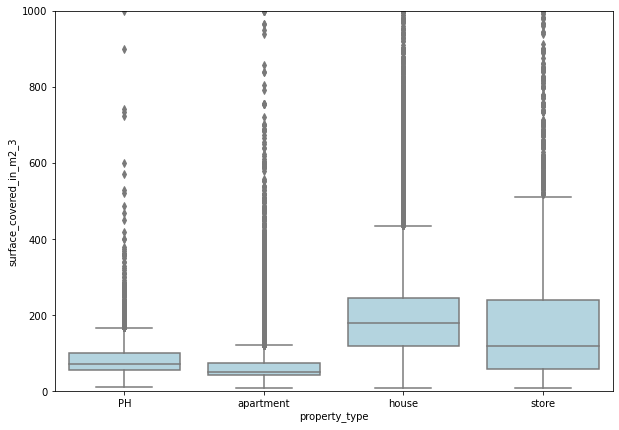

In [27]:
fig, axs = plt.subplots(figsize=(10,7))

sns.boxplot(data=data, y='surface_covered_in_m2_3', x='property_type',
               palette=["lightblue"])
plt.ylim(0,1000)

In [28]:
mask_PH_ol = (data['property_type']=='PH') & (data['surface_covered_in_m2_3']>1000)
data.surface_covered_in_m2_3[mask_PH_ol].count()

7

In [29]:
# Verificación de imputación
no_nulos = data.notnull().sum()
no_nulos_porcentual= no_nulos/(data.shape[0])*100
no_nulos, no_nulos_porcentual

(Unnamed: 0                    121220
 operation                     121220
 property_type                 121220
 place_name                    121197
 place_with_parent_names       121220
 country_name                  121220
 state_name                    121220
 geonames_id                   102503
 lat-lon                        69670
 lat                            69670
 lon                            69670
 price                         100810
 currency                      100809
 price_aprox_local_currency    100810
 price_aprox_usd               100810
 surface_total_in_m2            81892
 surface_covered_in_m2         101313
 price_usd_per_m2               68617
 price_per_m2                   87658
 floor                           7899
 rooms                          47390
 expenses                       14262
 properati_url                 121220
 description                   121218
 title                         121220
 image_thumbnail               118108
 surface_cov

In [30]:
mask_apart_ol = (data['property_type']=='apartment') & (data['surface_covered_in_m2_3']>1000)
data.surface_covered_in_m2_3[mask_apart_ol].count()

67

In [31]:
mask_house_ol = (data['property_type']=='house') & (data['surface_covered_in_m2_3']>10000)
data.surface_covered_in_m2_3[mask_house_ol].count()

16

In [32]:
mask_store_ol = (data['property_type']=='store') & (data['surface_covered_in_m2_3']>10000)
data.surface_covered_in_m2_3[mask_store_ol].count()

14

In [33]:
data.surface_covered_in_m2_3[(data['property_type']=='apartment')].median()

52.0

In [34]:
data.surface_covered_in_m2[(data['property_type']=='apartment')].median()

52.0

(0.0, 700.0)

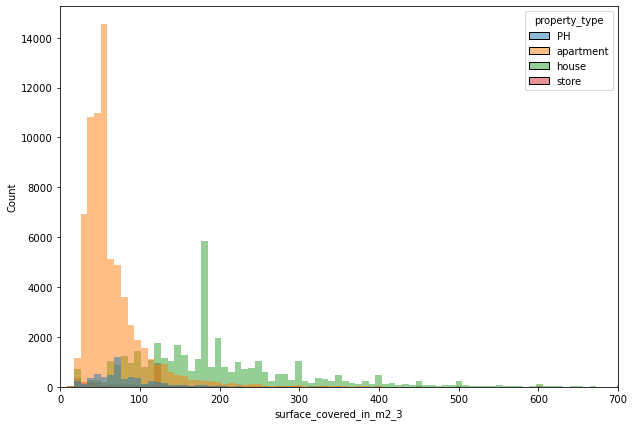

In [35]:
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data= data,x='surface_covered_in_m2_3', hue='property_type', bins=50000, color='k')
plt.xlim(0,700)

(0.0, 700.0)

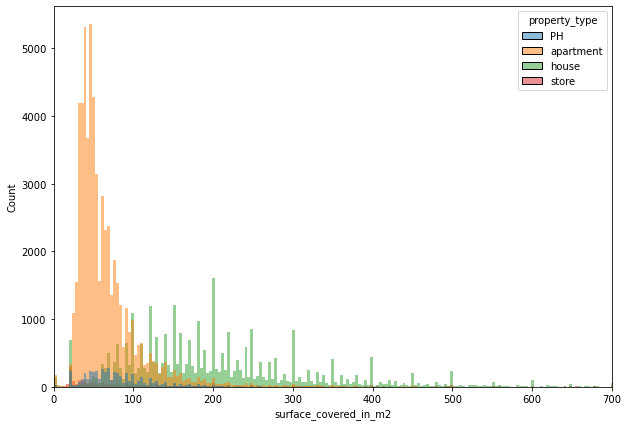

In [36]:
fig, axs = plt.subplots(figsize=(10,7))
sns.histplot(data= data,x='surface_covered_in_m2', hue='property_type', bins=50000, color='k')
plt.xlim(0,700)

In [37]:
price_x_sup = data.price/data_comp.surface_covered_in_m2_3
data['price_x_sup'] = price_x_sup

NameError: name 'data_comp' is not defined

In [ ]:
sns.histplot(data= data,x='price_usd_per_m2', hue='property_type', bins=5000, color='k')
plt.xlim(0,8000)

In [ ]:
sns.histplot(data= data,x='price_x_sup', hue='property_type', bins=50000, color='k')
plt.xlim(0,8000)

In [ ]:
sns.histplot(data= data,x='price_per_m2', hue='property_type', bins=50000, color='k')
plt.xlim(0,8000)